# Taylor expansion

http://firsttimeprogrammer.blogspot.com.co/2015/03/taylor-series-with-python-and-sympy.html

In [ ]:
import sympy as sy
import numpy as np
from sympy.functions import sin,cos
import matplotlib.pyplot as plt
from sympy import init_printing
init_printing(use_latex=True)

plt.style.use("ggplot")

# Define the variable and the function to approximate
x = sy.Symbol('x')
f = sin(x)

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function, x0, n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x, i).subs(x, x0))/(factorial(i))*pow((x - x0), i)
        i += 1
    return p

In [ ]:
# Plot results
def plot():
    x_lims = [-5,5]
    x1 = np.linspace(x_lims[0], x_lims[1], 800)
    y1 = []
    # Approximate up until 10 starting from 1 and using steps of 2
    for j in range(1, 10, 2):
        func = taylor(f, 0, j)
        print('Taylor expansion at n='+str(j), func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1, y1, label='order '+str(j))
        y1 = []
    # Plot the function to approximate (sine, in this case)
    plt.plot(x1, np.sin(x1), 'o', label='sin of x')
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

plot()

In [ ]:
# http://stackoverflow.com/questions/15256181/need-help-approximating-sine-function-in-python-using-taylor-series
import sympy
from sympy import init_printing
init_printing(use_latex=True)

from sympy import sin
from sympy.abc import x

num_of_terms = 3
# creates a generator
taylor_series = sin(x).series(n=None)

# takes the number of terms desired for your generator
taylor_series = sum([next(taylor_series) for i in range(num_of_terms)])

# creates a function that calculates the approximated sine function
mysin = sympy.lambdify((x,), taylor_series)
taylor_series

# Modelado Ionosferico

Graficas tomadas del [paper de Smith-Araujo][Ref1]

![](./Figs/fig3.png)

[Ref1]:<https://www.ngs.noaa.gov/CORS/Articles/SmithetalRadioScience.pdf>

Mi respuesta util
* http://stackoverflow.com/questions/40733545/trouble-with-taylor-series-in-python-sympy?noredirect=1#comment69350483_40733545

Otros links de interes
* http://homepages.math.uic.edu/~jan/mcs507f11/mtaylor.py
* https://github.com/sympy/sympy/blob/master/doc/src/modules/polys/ringseries.rst
* http://es.stack.aiseen.org/questions/19862587/plot-convert-an-expression-coming-from-sympy-taylor-series-with-matplotlib
* http://stackoverflow.com/questions/15256181/need-help-approximating-sine-function-in-python-using-taylor-series
* http://austinrochford.com/posts/2014-02-05-eulers-formula-sympy.html
* http://linuxmusica.com/polinomio-de-taylor-con-python-3/
* http://folk.ntnu.no/fredf/teaching/tkt4140/exercises/pythonExercises/


In [ ]:
import sympy as sy
import numpy as np
from sympy.functions import sin,cos
import matplotlib.pyplot as plt
from sympy import init_printing
init_printing(use_latex=True)

plt.style.use("ggplot")

# Define the variable and the function to approximate
x = sy.Symbol('x')
f = sin(x)

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function, x0, n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x, i).subs(x, x0))/(factorial(i))*pow((x - x0), i)
        i += 1
    return p

# Taylor approximation var x at x0 of the function 'function'
def taylor2(function, x, x0, n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x, i).subs(x, x0))/(factorial(i))*pow((x - x0), i)
        i += 1
    return p

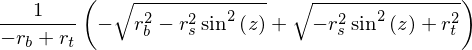

In [1]:
import sympy as sy
#import numpy as np

from sympy import init_printing
init_printing(use_latex=True)

# Define the variable and the function to approximate
z, d, r_s, N_e, r_t, r_s, r_b = sy.symbols('z  d r_s N_e r_t r_s r_b')

def W_model(r_t=r_t, r_b=r_b, r_s=r_s, z=z):
    
    s_model = sy.sqrt(pow(r_t, 2) - pow(r_s*sy.sin(z), 2)) - sy.sqrt(pow(r_b, 2) - pow(r_s*sy.sin(z), 2))
    d_model = r_t - r_b

    STEC_approx = N_e * s_model
    VTEC_approx = N_e * d_model
    
    return STEC_approx/VTEC_approx
            
f = W_model() 
f

## definiendo modelo de iono cascaron esferico 2D

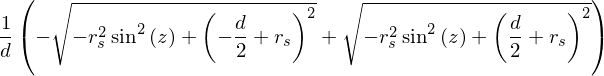

In [2]:
# Some details manipulations from fig 3
rb = r_s - d/2
rt = r_s + d/2

f = W_model(r_b=rb, r_t=rt, r_s=r_s, z=z) 
f

## aproximación por serie de taylor 

In [4]:
# http://stackoverflow.com/questions/40733545/trouble-with-taylor-series-in-python-sympy?noredirect=1#comment69350483_40733545
taylor_series = f.series(x=d, n=3)
Simplified_model = sy.collect(taylor_series.removeO(), d, sy.simplify)

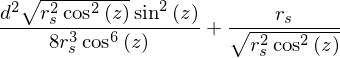

In [5]:
Simplified_model

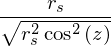

In [6]:
sy.simplify(sy.limit(Simplified_model, d, 0))

In [ ]:
# http://stackoverflow.com/questions/22857162/multivariate-taylor-approximation-in-sympy
def taylor_approximation(expr, x, max_order):
    taylor_series = expr.series(x=x, n=None)
    return sum([next(taylor_series) for i in range(max_order)])

x = sy.Symbol('x')
y = sy.Symbol('y')

fun_1d = sy.sin(x*sy.cos(y))
print(fun_1d)
taylor_approximation(fun_1d, x, 3)

In [ ]:
fun_2d = sy.sin(x*sy.cos(y))
taylor_approximation(taylor_approximation(fun_2d, x, 3), y, 3)